In [140]:
import pandas as pd
import matplotlib.pyplot as plt 


In [141]:
columns = ["target dim","origin dim","base_err","target_err","batcharayya","sparsity"]
df = pd.read_csv("res_sparse_alinged_cords_with_bach.csv",header=None, names=columns)

In [150]:
df.tail()

,target dim,origin dim,base_err,target_err,batcharayya,sparsity,t/d
4495,27.0,32.0,0.31102,0.32678,6.063458e+07,32.0,0.84375
4496,28.0,32.0,0.31102,0.32494,1.210066e+08,32.0,0.87500
4497,29.0,32.0,0.31102,0.32338,2.412011e+08,32.0,0.90625
4498,30.0,32.0,0.31102,0.32054,4.795746e+08,32.0,0.93750
4499,31.0,32.0,0.31102,0.31682,9.546736e+08,32.0,0.96875


In [143]:
df["t/d"] = df["target dim"] / df["origin dim"]

In [144]:
df.head()

,target dim,origin dim,base_err,target_err,batcharayya,sparsity,t/d
0,2.0,32.0,0.46254,0.46304,2.304662e-04,1.0,0.06250
1,3.0,32.0,0.46254,0.46262,2.368563e-07,1.0,0.09375
2,4.0,32.0,0.46254,0.46300,2.369535e-10,1.0,0.12500
3,5.0,32.0,0.46254,0.46310,2.416372e-13,1.0,0.15625
4,6.0,32.0,0.46254,0.46306,2.451951e-16,1.0,0.18750


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target dim   4500 non-null   float64
 1   origin dim   4500 non-null   float64
 2   base_err     4500 non-null   float64
 3   target_err   4500 non-null   float64
 4   batcharayya  4500 non-null   float64
 5   sparsity     4500 non-null   float64
 6   t/d          4500 non-null   float64
dtypes: float64(7)
memory usage: 246.2 KB


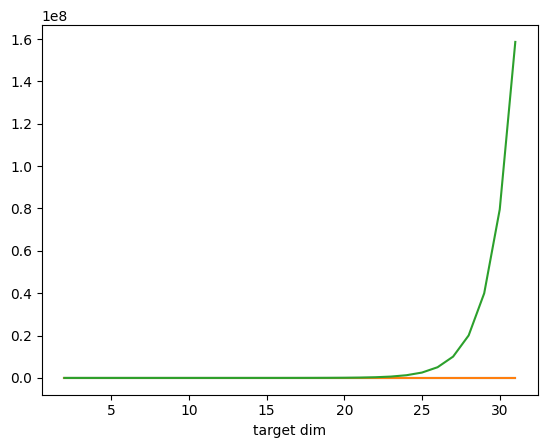

In [146]:
df.groupby("target dim").mean()["target_err"].plot()
df.groupby("target dim").mean()["base_err"].plot()
df.groupby("target dim").mean()["batcharayya"].plot()
plt.show()

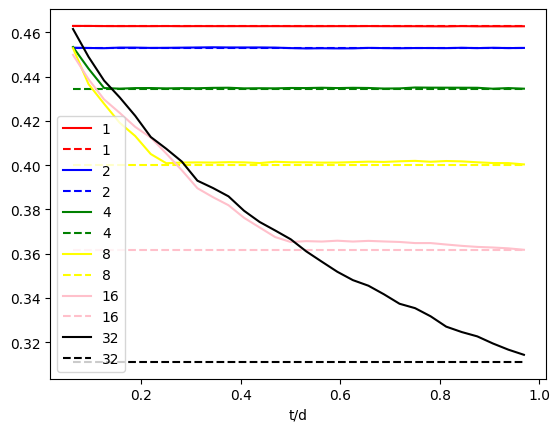

In [152]:
colors = ["red","blue", "green","yellow","pink","black"]
i =0 
fig, ax = plt.subplots()
for s in [1,2,4,8,16,32]:
    df[df["sparsity"] == s].groupby("t/d").mean()["target_err"].plot(c=colors[i],label= s)
    df[df["sparsity"] == s].groupby("t/d").mean()["base_err"].plot(c=colors[i],label= s,linestyle="dashed")
    i+= 1

plt.legend(loc='best',title="sparity")
plt.show()

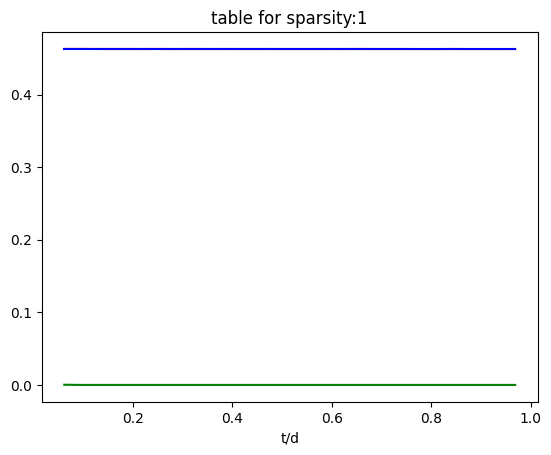

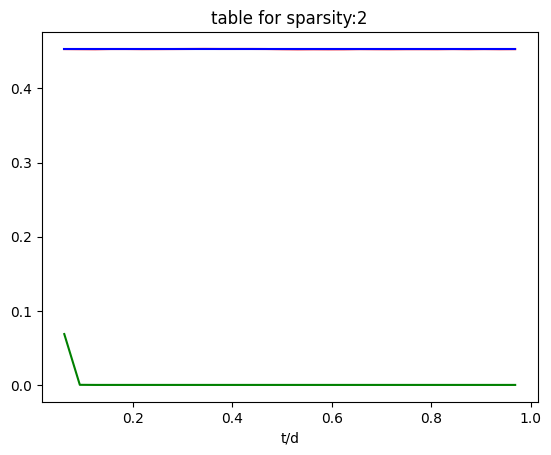

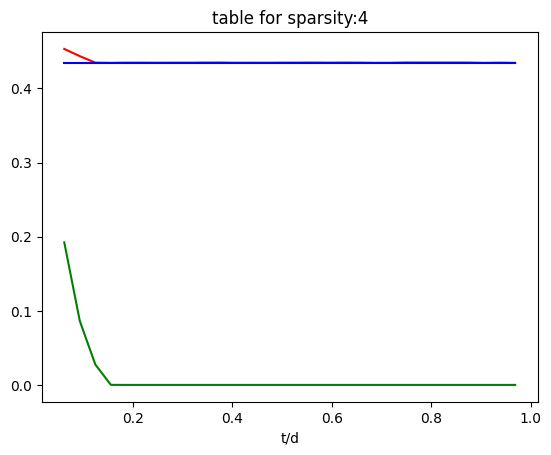

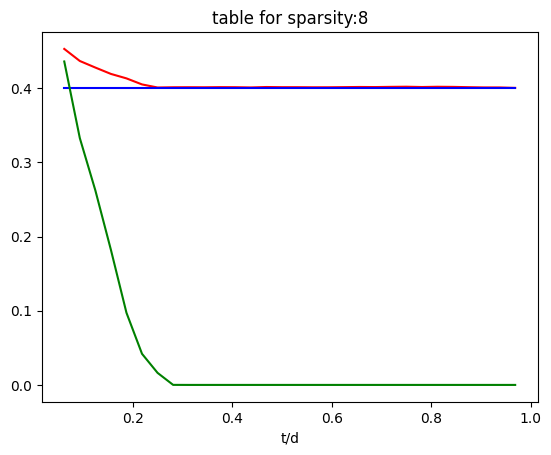

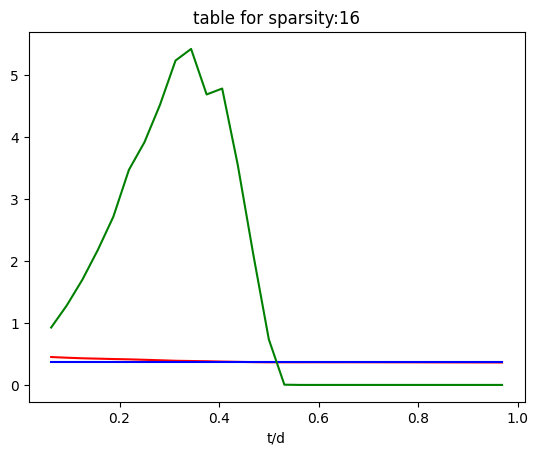

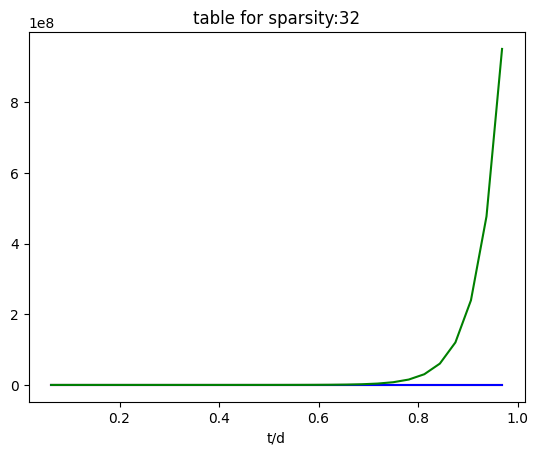

In [155]:
i =0 
fig, ax = plt.subplots()
for s in [1,2,4,8,16,32]:
    plt.title(f"table for sparsity:{s}")
    df[df["sparsity"] == s].groupby("t/d").mean()["target_err"].plot(c=colors[0],label="target err")
    df[df["sparsity"] == s].groupby("t/d").mean()["base_err"].plot(c=colors[1],label= "base err")
    df[df["sparsity"] == s].groupby("t/d").mean()["batcharayya"].plot(c=colors[2],label= "batcharayya bound")
    plt.show()